In [ ]:
import torch

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Housing.csv")

features =['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X = data[features].to_numpy(dtype=float)
y = data['price'].to_numpy(dtype=float)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

## Convert to pytorch sensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_val, y_train, y_val = train_test_split(
    X_tensor, y_tensor, test_size = 0.2, random_state = 23)

Saving Housing.csv to Housing (4).csv
Training samples: 436
Validation samples: 109


In [ ]:
def model(X, params):

    W1, W2, W3, W4, W5, B = params

    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X[:, 2]
    X4 = X[:, 3]
    X5 = X[:, 4]

    U = W1 * X1 + W2 * X2 + W3 * X3 + W4 * X4 + W5 * X5 + B

    return U.unsqueeze(1) ## keep output as a column vector

params = torch.zeros(6, requires_grad=True)

def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

Epoch 0: loss=1.0470, params=tensor([0.1059, 0.0820, 0.1118, 0.0945, 0.0813, 0.0062])
Epoch 500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])


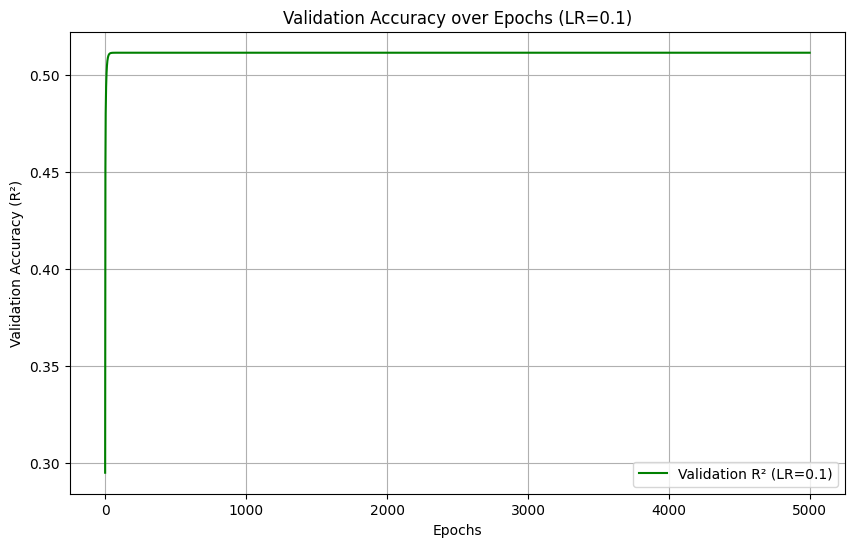

In [ ]:
val_r2_scores = []
learning_rate = 0.1
for epoch in range(5000):
  y_pred  = model(X_train, params)
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()

  ##Validation
  with torch.no_grad():
      y_val_pred = model(X_val, params)
      ss_res = torch.sum((y_val - y_val_pred) ** 2)
      ss_tot = torch.sum((y_val - torch.mean(y_val)) ** 2)
      val_r2 = 1 - ss_res / ss_tot
      val_r2_scores.append(val_r2.item())


  if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, params={params.data}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(val_r2_scores, label=f"Validation R² (LR={learning_rate})", color='green')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (R²)")
plt.title(f"Validation Accuracy over Epochs (LR={learning_rate})")
plt.legend()
plt.grid(True)
plt.show()

Epoch 0: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])


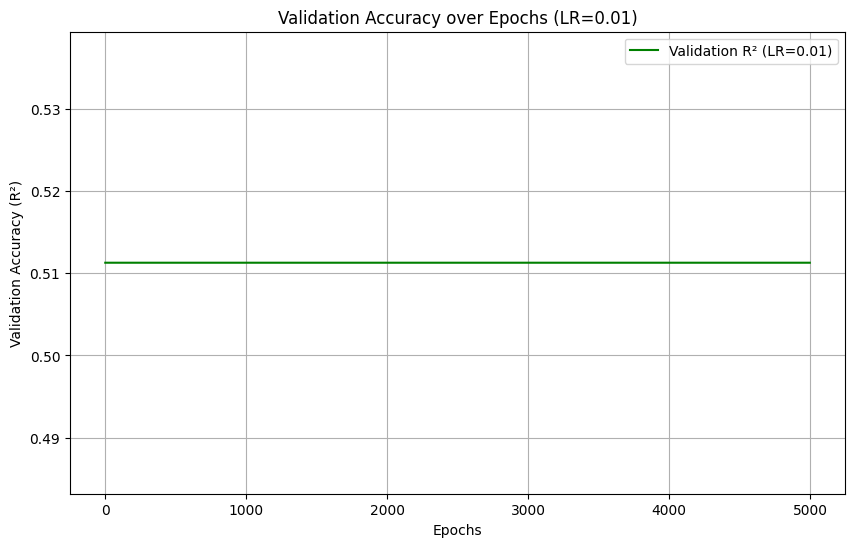

In [ ]:
val_r2_scores = []
learning_rate = 0.01
for epoch in range(5000):
  y_pred  = model(X_train, params)
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()

  with torch.no_grad():
      y_val_pred = model(X_val, params)
      ss_res = torch.sum((y_val - y_val_pred) ** 2)
      ss_tot = torch.sum((y_val - torch.mean(y_val)) ** 2)
      val_r2 = 1 - ss_res / ss_tot
      val_r2_scores.append(val_r2.item())


  if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, params={params.data}")


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(val_r2_scores, label=f"Validation R² (LR={learning_rate})", color='green')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (R²)")
plt.title(f"Validation Accuracy over Epochs (LR={learning_rate})")
plt.legend()
plt.grid(True)
plt.show()

Epoch 0: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])


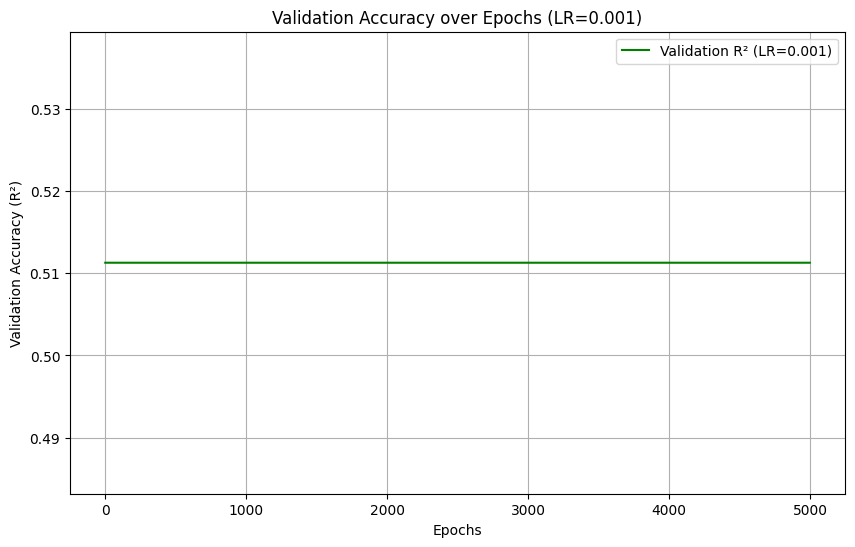

In [ ]:
val_r2_scores = []
learning_rate = 0.001
for epoch in range(5000):
  y_pred  = model(X_train, params)
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()

  with torch.no_grad():
      y_val_pred = model(X_val, params)
      ss_res = torch.sum((y_val - y_val_pred) ** 2)
      ss_tot = torch.sum((y_val - torch.mean(y_val)) ** 2)
      val_r2 = 1 - ss_res / ss_tot
      val_r2_scores.append(val_r2.item())


  if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, params={params.data}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(val_r2_scores, label=f"Validation R² (LR={learning_rate})", color='green')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (R²)")
plt.title(f"Validation Accuracy over Epochs (LR={learning_rate})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
val_r2_scores = []
learning_rate = 0.0001
for epoch in range(5000):
  y_pred  = model(X_train, params)
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()

  with torch.no_grad():
      y_val_pred = model(X_val, params)
      ss_res = torch.sum((y_val - y_val_pred) ** 2)
      ss_tot = torch.sum((y_val - torch.mean(y_val)) ** 2)
      val_r2 = 1 - ss_res / ss_tot
      val_r2_scores.append(val_r2.item())


  if epoch % 500 == 0:
        print(f"Epoch {epoch}: loss={loss.item():.4f}, params={params.data}")

Epoch 0: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 1500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 2500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 3500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4000: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])
Epoch 4500: loss=0.4519, params=tensor([0.3672, 0.0739, 0.2911, 0.2695, 0.1974, 0.0084])


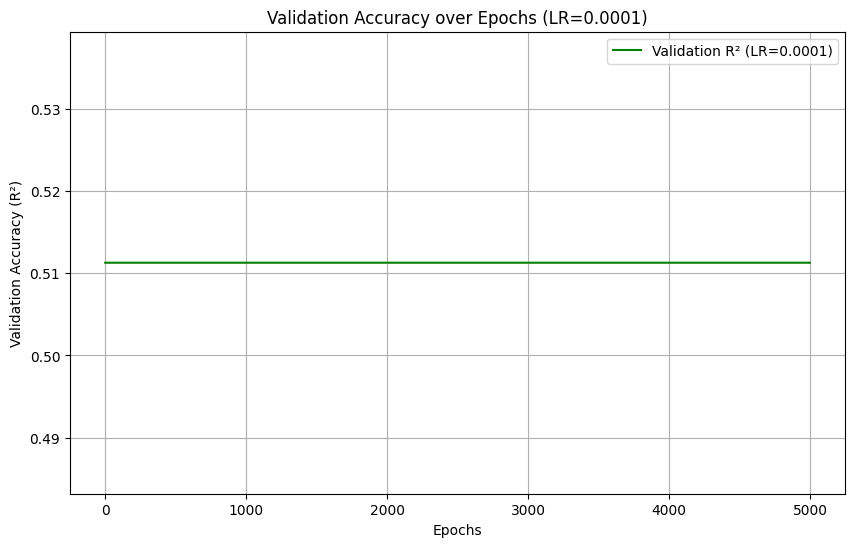

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(val_r2_scores, label=f"Validation R² (LR={learning_rate})", color='green')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (R²)")
plt.title(f"Validation Accuracy over Epochs (LR={learning_rate})")
plt.legend()
plt.grid(True)
plt.show()